---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5) # tossing a coin

1

In [3]:
np.random.binomial(1000, 0.5)/1000 # tossing the coin 1000 times and getting the mean

0.496

In [4]:
sum(np.random.binomial(1, 0.5, 2000) == 0)/2000

0.502

A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [5]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000

0.39045000000000002

In [6]:
chance_of_tornado = 0.01/100 # the chance of a tornado in any given day
np.random.binomial(100000, chance_of_tornado) # how many tornadoes would there be in 100 000 days?

11

In [7]:
# Number of tornadoes 2 days in a row
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000) # generates an array of daily random events, 1 mil days
# the distribution is uneven, given by the biased probability 0.01
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

# The truthfulness of this simulation is in the distribution and the number of events generated
print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

104 tornadoes back to back in 2739.72602739726 years


In [8]:
np.random.uniform(0, 1)

0.055315368252740194

In [9]:
np.random.normal(0.75)

1.8759293662650247

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [10]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.94854178892412466

In [11]:
np.std(distribution)

0.94854178892412466

In [12]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.13152006847616038

In [13]:
stats.skew(distribution)

-0.038732271107724654

In [14]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.0530686709036132

In [15]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.3417457937056434

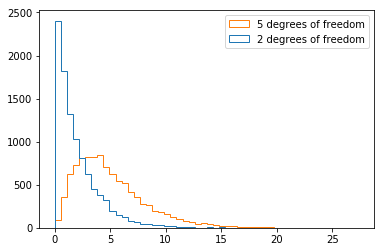

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [17]:
df = pd.read_csv('grades.csv')

FileNotFoundError: File b'grades.csv' does not exist

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [ ]:
early.mean()

In [ ]:
late.mean()

In [ ]:
from scipy import stats
stats.ttest_ind?

In [ ]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

In [ ]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

In [ ]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])